In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Feb 17 06:41:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Starting


In [3]:
# importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# Inline plotting
%matplotlib inline

In [4]:
# following code will prevent unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/HousingData.csv')
# seeing the first 5 rows to see the data.
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
data.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
# getting null values
def nullvalues(data):
    ls = [] 
    for i in data.columns:
        if data[i].isnull().sum() > 0:
            ls.append([i, data[i].isnull().sum()])
    if len(ls) != 0:
        print('Null values are present in ', ls)
        for i in ls:  # getting Percentage Null values and their datatype
            nullpercent = i[1]/data.shape[0]
            nullpercent = round(nullpercent,6)
            dt = type(data[i[0]][1])
            print(f'Null percentage in {i[0]} is {nullpercent * 100} % and datatype {dt}')
        return ls
    else: print('No Null values')

nullvalues(data)

Null values are present in  [['CRIM', 20], ['ZN', 20], ['INDUS', 20], ['CHAS', 20], ['AGE', 20], ['LSTAT', 20]]
Null percentage in CRIM is 3.9526 % and datatype <class 'numpy.float64'>
Null percentage in ZN is 3.9526 % and datatype <class 'numpy.float64'>
Null percentage in INDUS is 3.9526 % and datatype <class 'numpy.float64'>
Null percentage in CHAS is 3.9526 % and datatype <class 'numpy.float64'>
Null percentage in AGE is 3.9526 % and datatype <class 'numpy.float64'>
Null percentage in LSTAT is 3.9526 % and datatype <class 'numpy.float64'>


[['CRIM', 20],
 ['ZN', 20],
 ['INDUS', 20],
 ['CHAS', 20],
 ['AGE', 20],
 ['LSTAT', 20]]

In [13]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace = True)

In [14]:
nullvalues(data)

No Null values


# Preprocessing

In [15]:
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']
X.shape, y.shape

((506, 13), (506,))

In [16]:
from sklearn.model_selection import train_test_split
X_train,  X_test,y_train, y_test = train_test_split(X,y, train_size = 0.75 )

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 13), (379,), (127, 13), (127,))

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
def analyse(model, x, y):
    y_pred = model.predict(x)
    residuals =  y_pred - y
    
    rmse = sqrt(mean_squared_error(y, y_pred))
    print('Model RMSE:',round(rmse, 4))

    r2=r2_score(y, y_pred)
    print('Model r2_score:',round(r2, 4))


    fig , ax = plt.subplots(1,3, figsize = (15,5))
   
    ax[0].set_title('Error Distribution')
    ax[0].set_xlabel('Error Values')
    p1 = sns.histplot(residuals, kde = True, bins = 50, ax = ax[0])
    
    ax[1].set_title('actual vs predictions')
    ax[1].set_ylabel('predictons')
    ax[1].set_xlabel('actual')
    p2 = sns.scatterplot(y, y_pred, ax = ax[1])
    ax[2].set_title('Residual plot')
    
    p3 = sns.residplot(y, residuals, lowess = True, ax = ax[2])
    ax[2].set_ylabel('residuals')
    ax[2].set_xlabel('number of people')
    plt.tight_layout()

# Making ANN Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
# baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [20]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -29.76 (5.37) MSE


In [21]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold, scoring = 'r2')
print('R2 score: ', results.mean(), 'and standard deviation', results.std())

R2 score:  0.6188826687056265 and standard deviation 0.05998522876327413


In [26]:
estimator.fit(X_train, y_train)

Model RMSE: 4.754
Model r2_score: 0.7061


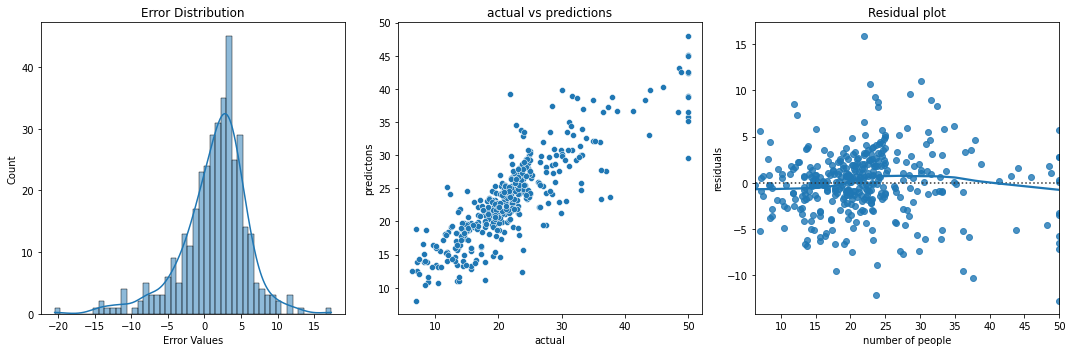

In [31]:
analyse(estimator, X_train, y_train)

Model RMSE: 5.1861
Model r2_score: 0.7438


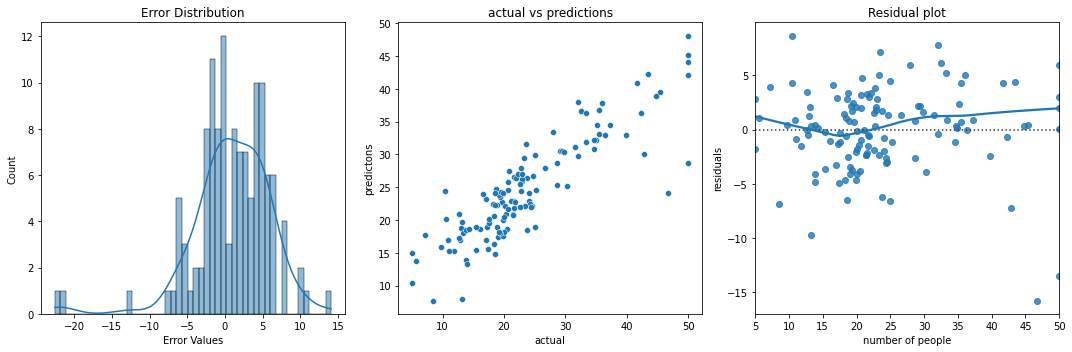

In [29]:
analyse(estimator, X_test, y_test)

In [30]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [32]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -17.74 (8.13) MSE


In [33]:
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring = 'r2')
print('R2 score: ', results.mean(), 'and standard deviation', results.std())

R2 score:  0.7466336608413029 and standard deviation 0.1174114521809176


Model RMSE: 3.74
Model r2_score: 0.8181


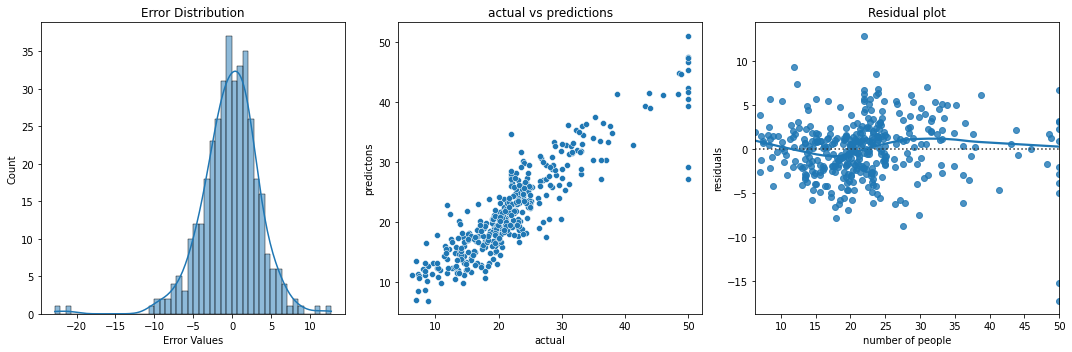

In [34]:
pipeline.fit(X_train, y_train)
analyse(pipeline, X_train, y_train)

Model RMSE: 4.5626
Model r2_score: 0.8017


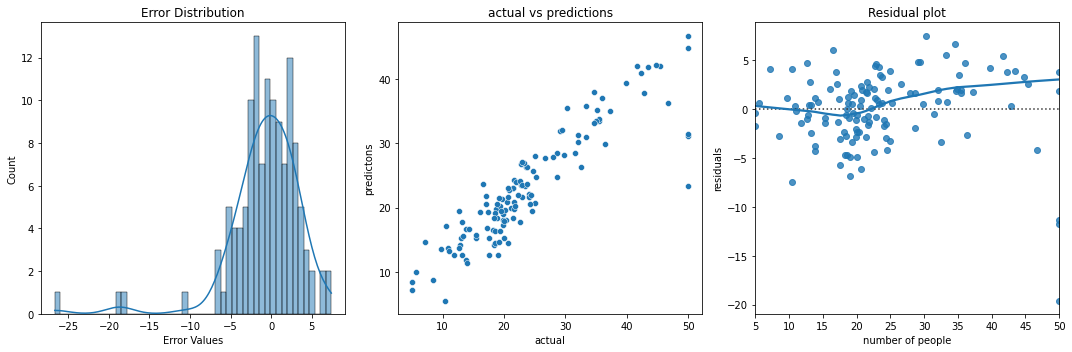

In [35]:
analyse(pipeline, X_test, y_test)

In [36]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [37]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -15.72 (8.76) MSE


In [38]:
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring = 'r2')
print('R2 score: ', results.mean(), 'and standard deviation', results.std())

R2 score:  0.7916978606438434 and standard deviation 0.08771858166673678


Model RMSE: 3.3337
Model r2_score: 0.8555


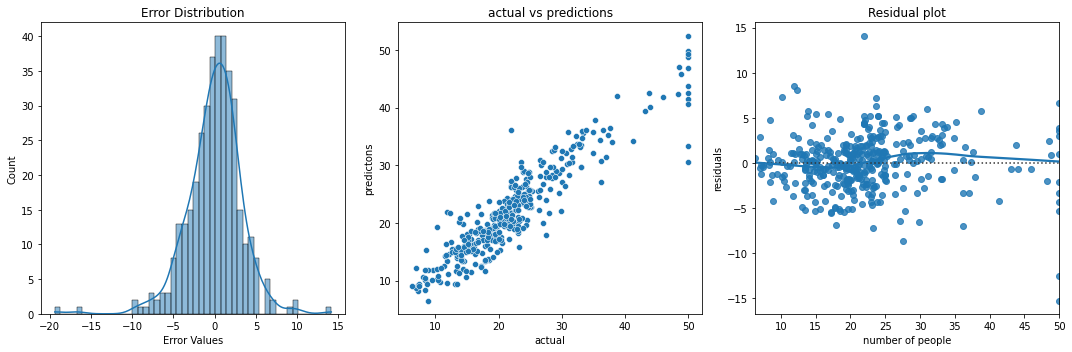

In [39]:
pipeline.fit(X_train, y_train)
analyse(pipeline, X_train, y_train)

Model RMSE: 4.0216
Model r2_score: 0.8459


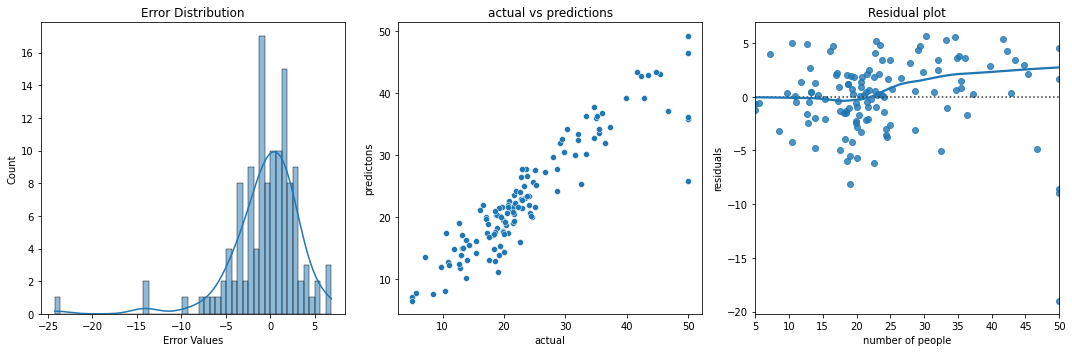

In [40]:
analyse(pipeline, X_test, y_test)